<a href="https://colab.research.google.com/github/tlmartiner/Integracion_de_datos_y_prospectiva/blob/main/1_Caracterizaci%C3%B3n_VA_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caracterización Distribución Agregada de Pérdidas**

Se quiere caracterizar (Media, Desviación, Asimetria, Kurtosis) la distribución de pérdidas como resultado de las pérdidas a los créditos que posee una FINTECH. Las variables que definen la Loss Distribustion Approach (LDA) (distribución agregada de pérdidas) se obtiene del producto de las siguientes variables:
* Monto (EAD): Es el monto de dinero que una persona solicita a la FINTECH.
* Probabilidad Default: Es la probabilidad de que una persona incumpla el crédito a lo largo de su vigencia
* LGD (Loss Guarantee Default): Es la garantía que el solicitante puede colocar sobre el crédito (Carro, casa, beca, finca).

**0. Se cargan las librerías de trabajo**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Para gráficos de distribuciones


In [ ]:
# Conexión con mi unidad en Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Se cargan los datos**

In [ ]:
# DataFrame = Tabla de datos
nxl = pd.read_excel('/content/drive/MyDrive/SEMESTRE 9/Integración de datos y prospectiva/Bases de datos/6. SolicitantesCrédito(USD).xlsx')
XDB = pd.read_excel('/content/drive/MyDrive/SEMESTRE 9/Integración de datos y prospectiva/Bases de datos/6. SolicitantesCrédito(USD).xlsx', sheet_name=1)
display(XDB)

,Unnamed: 0,Edad,Genero,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,1,38,NR,Casado,1,0,0,3,Bachiller,Ninguno,...,48,18.375890,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.041659,582.478943,0.063702
1,2,51,NR,Separado,6,1,1,4,Técnico,Ninguno,...,36,5.062492,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.234951,479.839966,0.465636
2,3,37,Mujer,Casado,2,0,0,3,Tecnólogo,Indefinido,...,36,10.287688,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.170330,417.653107,0.290071
3,4,29,NR,Separado,1,0,0,2,Tecnólogo,Ninguno,...,24,15.458878,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.201659,316.791107,0.278389
4,5,42,Mujer,Casado,3,4,4,2,Especializacion,Ninguno,...,24,24.995180,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.140929,441.809570,0.203359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,8372,48,Hombre,Separado,0,0,0,3,Tecnólogo,Fijo,...,36,27.043503,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.056132,550.980408,0.091441
5838,8374,31,Hombre,Soltero,2,0,0,5,Bachiller,Indefinido,...,48,25.579568,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.035120,659.471375,0.066962
5839,8375,38,Hombre,Separado,0,0,0,3,Bachiller,Labor Contratada,...,36,21.508792,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.101976,465.011536,0.165936
5840,8376,43,Mujer,Casado,1,2,2,2,Tecnólogo,Ninguno,...,36,11.047468,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.156707,423.237305,0.247763


In [ ]:
#Se calcula la distribución LDA
LDA = XDB.iloc[:,25]*XDB.iloc[:,33]*(1+XDB.iloc[:,35])
XDB['LDA'] = LDA

**2. Caraterización de la distribución LDA**

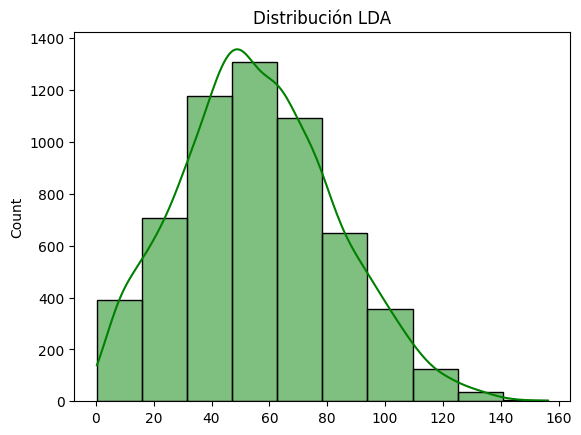

,LI,LS,ND,Perdida
0,0.388425,15.974978,392.0,8.181701
1,15.974978,31.561531,706.0,23.768254
2,31.561531,47.148084,1175.0,39.354807
3,47.148084,62.734637,1307.0,54.941360
4,62.734637,78.321190,1091.0,70.527913
5,78.321190,93.907743,647.0,86.114466
6,93.907743,109.494295,355.0,101.701019
7,109.494295,125.080848,126.0,117.287572
8,125.080848,140.667401,37.0,132.874125
9,140.667401,156.253954,6.0,148.460678


In [ ]:
NC = 10 #Clusters

plt.figure()
sns.histplot(LDA, kde = True, bins = NC, color = 'green')
plt.title('Distribución LDA')
plt.show()

#Obtenemos la información de la distribución
counts, bins_edges = np.histogram(LDA, bins = NC)  #Bind_edge son los limites

#Para obtener los limites discriminados por inferior y superior
LI = bins_edges[:-1]; LS = bins_edges[1:]

#Para conocer la marca de clase --> El valor representativo de cada intervalo
mc = (LI+LS)/2

#Se cre la tabla de caracterización
TAsq = np.column_stack((LI, LS, counts, mc))
df = pd.DataFrame(TAsq, columns = ['LI', 'LS', 'ND', 'Perdida'])
display(df)


**3. Se obtiene las medidas de dispersión (Asimetria, Kurtosis) y tendencia central (Media, varianza, dispersión)**

In [ ]:
u = np.sum(mc*counts)/np.sum(counts) # Valor esperado
print ("La media de los datos es:", u)

varianza = np.sum(counts*(mc-u)**2)/np.sum(counts) #Si tengo más intervalos es más preciso
print ("La varianza de los datos es:", varianza)

desviacion = np.sqrt(varianza)
print ("La desviación de los datos es:", desviacion)

#Quiero identificar datos raros o outliers
LIe = u-2*desviacion; LSe = u+2*desviacion
filas_out = np.where((LDA<LIe)|(LDA>LSe)) [0]
LDA.iloc[filas_out]

from scipy.stats import skew, kurtosis
print("El coeficiente de Asímetria colab es", skew(LDA))
print("El coeficiente de Curtosis colab es", kurtosis(LDA))

#Coeficiente de Asímetria
cas = np.sum(counts*(mc-u)**3)/(np.sum(counts)*desviacion**3)
print ("El coeficiente de asimetría es:", cas)
vcas = (skew(LDA)-cas)/skew(LDA)
print ("La variación de coeficiente de asímetria es:", vcas*100)

# Coeficiente de Cuertosis
curt = np.sum(counts*(mc-u)**4)/(np.sum(counts)*desviacion**4)-3
print ("El coeficiente de curtosis es:", curt)

La media de los datos es: 56.04058301402913
La varianza de los datos es: 728.9443323653097
La desviación de los datos es: 26.998969098195392
El coeficiente de Asímetria colab es 0.28830609042395505
El coeficiente de Curtosis colab es -0.2302352715704683
El coeficiente de asimetría es: 0.28716410440756895
La variación de coeficiente de asímetria es: 0.3961019396804293
El coeficiente de curtosis es: -0.25081756709865033


**ANÁLISIS DE RESULTADOS**

Del código anterio se puede observar que la libreria google.colab nos permite subir los datos automaticamente. De acuerdo con la bases de datos, se puede observar un total de 5842 datos y un total de 37 variables socioeconómicas. De las medidas de tedencia central, se puee observar que la media de las pérdidas se ubicó en 56.045 dólares por crédito, mientras que la desviación de los datos se ubicó en promedio en los 26 dólares. Es importante mencionar que el coeficiente de asímetría se ubicó levemente por encima de cero, lo que indica que la distribución tiende a ser de cola larga, con una curtosis negativa, lo que indica la gran dispersión de los datos. En este sentido se pudo evidenciar un total de 152 datos outliers, con respecto al total de los datos, esto representa el 2.6% (152/5842) de los datos raros, lo que está por debajo de 5%.

**4. Los parámetros de riesgo son: Pérdidas Esperadas, Pérdidas no Esperadas, Péridas Catastróficas.**

In [ ]:
PE = len(np.where(LDA<u)[0])
print("Las péridadas esperadas son:", PE)
OpVar = np.percentile(LDA, 99.9)
print("El costo de aseguramiento de cada crédito es", OpVar)
PC = len(np.where(LDA>OpVar)[0])
print("Las pérdidas catastróficas son:", PC)
PNE = len(np.where((LDA>=u)&(LDA<=OpVar))[0])
print("Las pérdidas no esperadas son:", PNE)

Las péridadas esperadas son: 3048
El costo de aseguramiento de cada crédito es 139.45587510301962
Las pérdidas catastróficas son: 6
Las pérdidas no esperadas son: 2788
